In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
#from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Trainability

## 1D, Gaussian Function

In [2]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


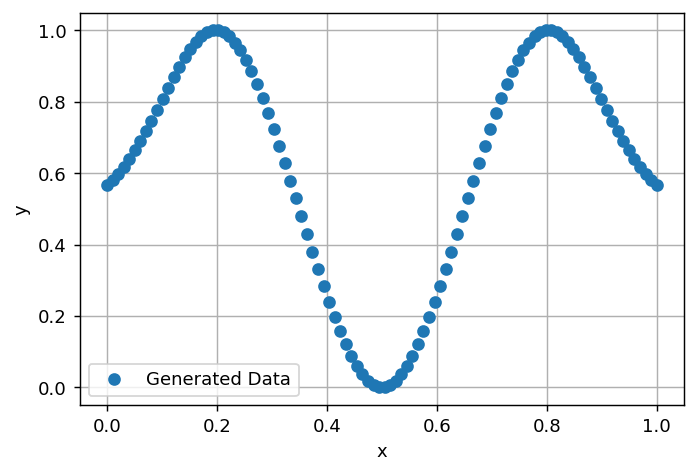

In [3]:
fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Generated Data"])

plt.grid()
plt.show()


fig.savefig(image_path("1D_gaussian_data.pdf"), bbox_inches='tight')

In [26]:
qnn_list1 = loader(data_path("trainability_qcn_1D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_1D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_1D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_1D_epochs_10000"))

In [27]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)/2
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)/2
avg4 = np.mean(loss4, axis=0)

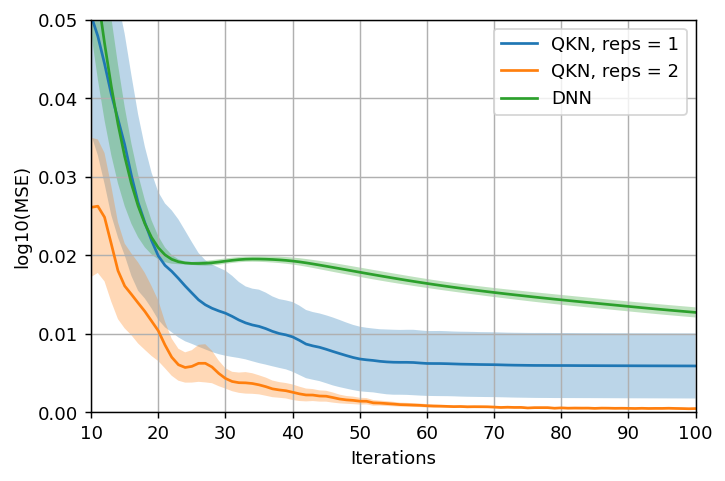

In [30]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("log10(MSE)")
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.xlim([10, 100])
plt.ylim([0, 0.05])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [7]:
r2_1 = r2(qnn_list1, x_qnn, y)
r2_2 = r2(qnn_list2, x_qnn, y)
r2_3 = r2(dnn_list1, x_dnn, y)

In [25]:
print(f"{r2_1:.6f}, {r2_2:.6f}, {r2_3:.6f}")
print(f"{avg1[-1]:.6f}, {avg2[-1]:.6f}, {avg3[-1]:.6f}, {avg4[-1]:.6f}")
print(f"{std1[-1]:.6f}, {std2[-1]:.6f}, {std3[-1]:.6f}")

0.944021, 0.996463, 0.892809
0.006678, 0.000451, 0.012701, 0.000052
0.004323, 0.000268, 0.001290


## 2D

In [32]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

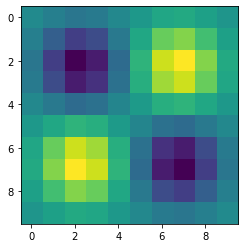

In [33]:
plt.imshow(y.reshape(n,n))
plt.show()

In [34]:
qnn_list1 = loader(data_path("trainability_qnn_2D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_2D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_2D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_2D_epochs_10000"))

In [35]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

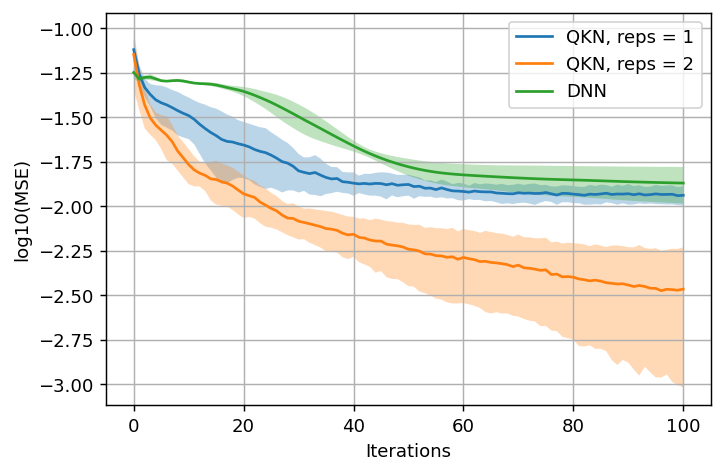

In [36]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, np.log10(avg1 - std1), np.log10(avg1 + std1), alpha=alpha)
plt.fill_between(epochs, np.log10(avg2 - std2), np.log10(avg2 + std2), alpha=alpha)
plt.fill_between(epochs, np.log10(avg3 - std3), np.log10(avg3 + std3), alpha=alpha)
plt.plot(epochs, np.log10(avg1))
plt.plot(epochs, np.log10(avg2))
plt.plot(epochs, np.log10(avg3))

plt.xlabel("Iterations")
plt.ylabel("log10(MSE)")
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("2D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [37]:
r2_1 = r2(qnn_list1, x_qnn, y)
r2_2 = r2(qnn_list2, x_qnn, y)
r2_3 = r2(dnn_list1, x_dnn, y)

In [38]:
print(f"{r2_1:.6f}, {r2_2:.6f}, {r2_3:.6f}")
print(f"{avg1[-1]:.6f}, {avg2[-1]:.6f}, {avg3[-1]:.6f}, {avg4[-1]:.6f}")
print(f"{std1[-1]:.6f}, {std2[-1]:.6f}, {std3[-1]:.6f}")

0.769961, 0.933218, 0.732212
0.011516, 0.003417, 0.013490, 0.008755
0.001430, 0.002458, 0.003130


## 3D

In [2]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

In [3]:
qnn_list1 = loader(data_path("trainability_qnn_3D_reps_1"))
qnn_list2 = loader(data_path("trainability_qnn_3D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_3D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_3D_epochs_10000"))

In [4]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

NameError: name 'dnn_list' is not defined

ValueError: operands could not be broadcast together with shapes (101,) (201,) 

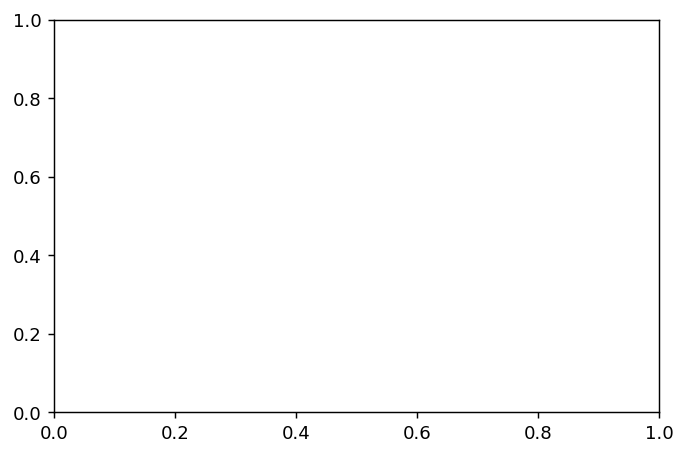

In [5]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, np.log10(avg1 - std1), np.log10(avg1 + std1), alpha=alpha)
plt.fill_between(epochs, np.log10(avg2 - std2), np.log10(avg2 + std2), alpha=alpha)
plt.fill_between(epochs, np.log10((avg3 - std3)[:101]), np.log10((avg3 + std3)[:101]), alpha=alpha)
plt.plot(epochs, np.log10(avg1))
plt.plot(epochs, np.log10(avg2))
plt.plot(epochs, np.log10(avg3[:101]))

plt.xlabel("Iterations")
plt.ylabel("log10(MSE)")
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("3D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [ ]:
print(avg1[-1], avg2[-1], avg3[-1])

In [ ]:
y_pred = qnn_list2[0].predict(x)
print(r2(y_pred, y))

In [ ]:
plt.imshow(y_pred.reshape(n,n,n)[2])
plt.show()

### Deep Quantum Kernel Network

In [ ]:
qnn = loader(data_path("trainability_qnn_3D_deep"))

y_pred = qnn.predict(x)
print(r2(y_pred, y))

In [ ]:
plt.imshow(y_pred.reshape(n,n,n)[2])
plt.show()